# This time with more rolling options

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

In [2]:
rng = np.random.default_rng()

# this rolls one n_dice with n_sides once each. 
def roll_dice(n_sides, n_dice):
    return (rng.integers(low = 1, high = n_sides, size = n_dice, endpoint=True)).tolist()


# Let's reform the roll and attack functions so that they are markov chaning
def attack(n_a_troops, n_d_troops, n_a_dice, n_a_sides=6, n_d_sides=6):
    # n_a_troops is the number of troops on the board in attackers position
    # n_d_troops is the number of troops on the board in the defenders position
    # n_a_dice is the number of attack dice desired to be rolled each time
    # n_a_sides is number of sides on the attack dice (usually 6)
    # n_d_sides is numer of sides on the defend dice (usually 6)
    
    # number of defending dice. always assumed to be 2 unless less troops available
    ndd = 2
    
    score = [0,0]
    
    # no troops left to attack or defend with
    # this while condition assumes we're fighting to the death
    while (n_a_troops > 1 and n_d_troops > 0):
        # attack!
        # n_a_sides is n_a_sides unless less troops available. fight to the death!
        nad = n_a_troops-1 if n_a_troops -1 < n_a_dice else n_a_dice
        ndd = n_d_troops if n_d_troops < ndd else ndd
        
        min_die = min([nad, ndd])
        
        a_rolls = roll_dice(n_a_sides, nad)
        d_rolls = roll_dice(n_d_sides, ndd)
        
        a_rolls.sort(reverse=True)
        d_rolls.sort(reverse=True)
        
        for i in range(min_die):
            if a_rolls[i] > d_rolls[i]:
                # first number is attacker wins
                score[0] +=1
                n_d_troops -=1
            else:
                # second number is defender wins
                score[1] +=1
                n_a_troops -=1
    
    # return final troop stats and score (a bit redundant.. )
    return score
    

def attack_stats(n_a_troops, n_d_troops, n_a_dice=3, n_iter=10000, n_a_sides=6, n_d_sides=6):
    results = {}
    for i in range(n_iter):
        end_state = attack(n_a_troops, n_d_troops, n_a_dice, n_a_sides, n_d_sides)
        name = str(end_state)
        if name in results.keys():
            results[name] +=1
        else:
            results[name] = 1
    
    return results

def prep_for_graph(results):
    labels = []
    values = []
    for i in sorted(results.keys()):
        labels.append(i)
        values.append(results[i])
    
    return labels, values

def normalize_values(values):
    total = 0
    for i in values:
        total += i
    output = []
    for i in values:
        # only keep two digits
        output.append(int(10000 * i/total)/100)
    return output

# shamelessly copy-pasting code found on the internet
def autolabel(ax, rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}%'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
        
def fancy_plot(labels, values):
    fig, ax = plt.subplots()
    rects = ax.bar(labels, normalize_values(values))
    #ax.set_title("Attack Dice ="+str(n_attack)+", Defender Dice ="+str(n_deffend)+"\n"+str(n_rolls)+" rolls\n[Attacker wins, Deffender wins]")
    ax.yaxis.set_major_formatter(mticker.PercentFormatter(decimals=0))
    ax.set_ylim(ymax=max(normalize_values(values)) * 1.15)

    autolabel(ax, rects)
    plt.show()

In [3]:
score = attack(7, 5, 3, n_d_sides = 7)
print(score)

[5, 4]


In [4]:
score = attack_stats(3, 10)

In [5]:
print(score)

{'[2, 2]': 1584, '[0, 2]': 4508, '[1, 2]': 2429, '[3, 2]': 745, '[4, 2]': 385, '[5, 2]': 171, '[6, 2]': 93, '[7, 2]': 43, '[10, 1]': 5, '[8, 2]': 22, '[10, 0]': 7, '[9, 2]': 8}


In [6]:
labels, values = prep_for_graph(score)
print(labels)

['[0, 2]', '[1, 2]', '[10, 0]', '[10, 1]', '[2, 2]', '[3, 2]', '[4, 2]', '[5, 2]', '[6, 2]', '[7, 2]', '[8, 2]', '[9, 2]']


<IPython.core.display.Javascript object>


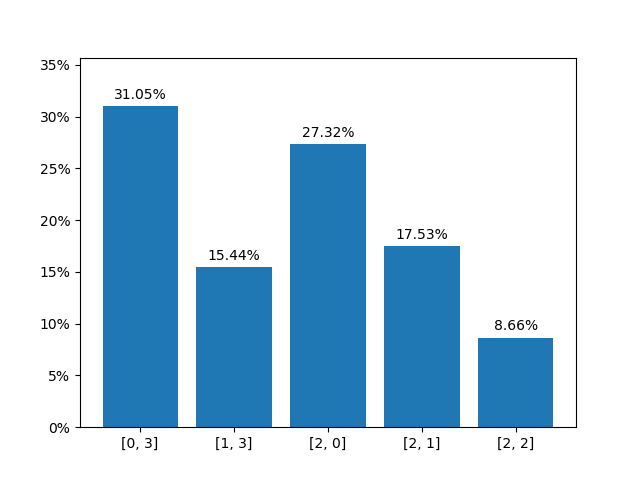

In [7]:
score = attack_stats(4, 2, n_d_sides = 7)
labels, values = prep_for_graph(score)
fancy_plot(labels, values)

In [8]:
# i really want to flip around the 2nd half of the plot, so that we have "extreme defender win" on left-most, and "extreme attacker win" on right-most

import ast

def prep_for_graph_better(results):
    labels = []
    values = []
    for i in sorted(results.keys()):
        labels.append(ast.literal_eval(i))
        values.append(results[i])
    
    # rederive the number of attack dice, defend dice
    ndd = 0
    nad = 0
    labels_strings = []
    for i in range(len(labels)):
        if labels[i][0] == 0:
            nad = labels[i][1]
        if labels[i][1] == 0:
            ndd = labels[i][0]
        labels_strings.append(str(labels[i]))
    
    print(ndd, nad)
    # flip second half of list
    for i in range(ndd, int(nad/2) + ndd ):
        end = ndd + ndd + nad - 1 - i
        temp_l = labels_strings[i]
        temp_v = values[i]
        labels_strings[i] = labels_strings[end]
        labels_strings[end] = temp_l
        values[i] = values[end]
        values[end] = temp_v
    
    return labels_strings, values



2 3


<IPython.core.display.Javascript object>


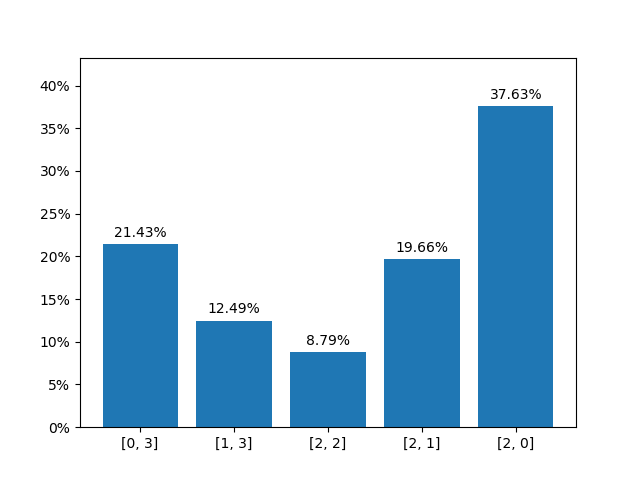

In [10]:
# attacking 4 vs 2
score = attack_stats(4, 2)
labels, values = prep_for_graph_better(score)
fancy_plot(labels, values)

2 3


<IPython.core.display.Javascript object>


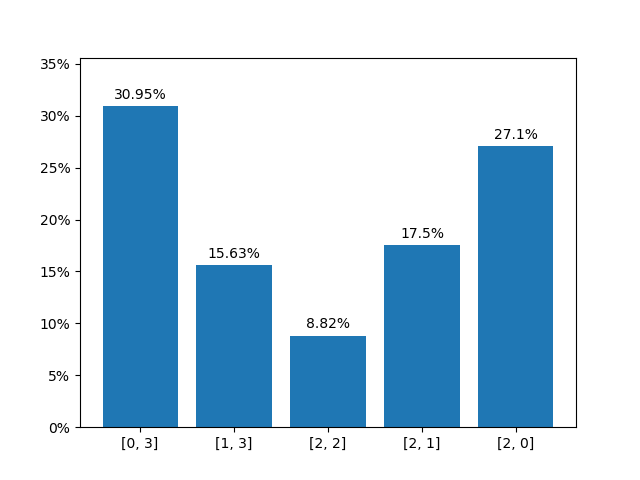

In [11]:
# attacking 4 vs 2 when defender has +1 dice side
score = attack_stats(4, 2, n_d_sides=7)
labels, values = prep_for_graph_better(score)
fancy_plot(labels, values)

In [12]:
# But we still have the question - "But how much are we winning?!!"
# simply adding together win percentages gives us the answer

# want to also get the cdf

def prep_for_graph_best(results):
    labels = []
    values = []
    for i in sorted(results.keys()):
        labels.append(ast.literal_eval(i))
        values.append(results[i])
    
    # normalize upfront
    print(values)
    values = normalize_values(values)
    print(values)
    cdf = [0]
    loss_vs_win = {
        'loss': 0,
        'win': 0
    }
    
    # rederive the number of attack dice, defend dice
    ndd = 0
    nad = 0
    labels_strings = []
    for i in range(len(labels)):
        if labels[i][0] == 0:
            nad = labels[i][1]
        if labels[i][1] == 0:
            ndd = labels[i][0]
        labels_strings.append(str(labels[i]))
    
    # flip second half of list
    for i in range(ndd, int(nad/2) + ndd ):
        end = ndd + ndd + nad - 1 - i
        temp_l = labels_strings[i]
        temp_v = values[i]
        labels_strings[i] = labels_strings[end]
        labels_strings[end] = temp_l
        values[i] = values[end]
        values[end] = temp_v
    
    # one last time because who cares about optomizing this
    
    for i in range(len(values)):
        cdf.append(values[i] + cdf[-1])
        if i < ndd :
            loss_vs_win['loss'] += values[i]
        else:
            loss_vs_win['win'] += values[i]
        
    cdf = cdf[1:]
    
    return labels_strings, values, cdf, loss_vs_win

[3137, 2448, 1121, 1501, 1154, 639]
[31.37, 24.48, 11.21, 15.01, 11.54, 6.39]


<IPython.core.display.Javascript object>


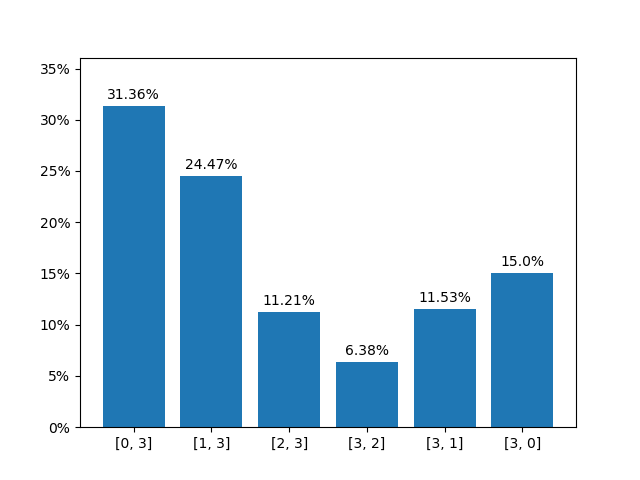

In [13]:
score = attack_stats(4, 3, n_d_sides = 7)
labels, values, cdf, lvw = prep_for_graph_best(score)
fancy_plot(labels, values)

In [14]:
print(lvw)

{'loss': 67.06, 'win': 32.94}


In [15]:
def plot_cdf(labels, cdf, lvw):
    plt.plot(labels, cdf, marker = 'o')
    plt.axhline(y=lvw['loss'])
    ax = plt.gca()
    ax.set_ylim(bottom = 0)
    plt.text(0, lvw['loss']-5, "loss:"+str(lvw['loss']), color = "red")
    plt.text(0, lvw['loss']+3, "win: "+str(lvw['win']), color = "green")
    plt.show()

<IPython.core.display.Javascript object>


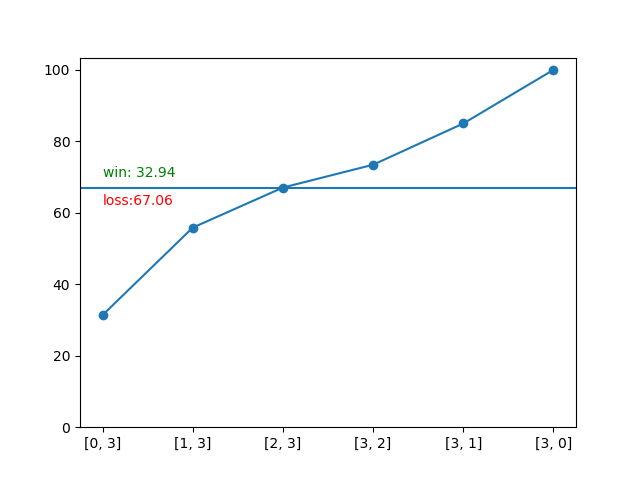

In [16]:
plot_cdf(labels, cdf, lvw)

[3113, 2451, 14, 26, 9, 1748, 1137, 684, 407, 212, 105, 76, 18]
[31.13, 24.51, 0.14, 0.26, 0.09, 17.48, 11.37, 6.84, 4.07, 2.12, 1.05, 0.76, 0.18]


<IPython.core.display.Javascript object>


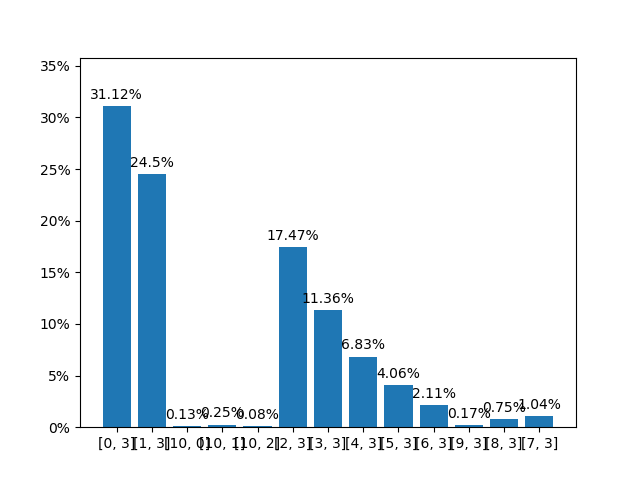

In [18]:
score = attack_stats(4, 10, n_d_sides=7)
labels, values, cdf, lvw = prep_for_graph_best(score)
fancy_plot(labels, values)

<IPython.core.display.Javascript object>


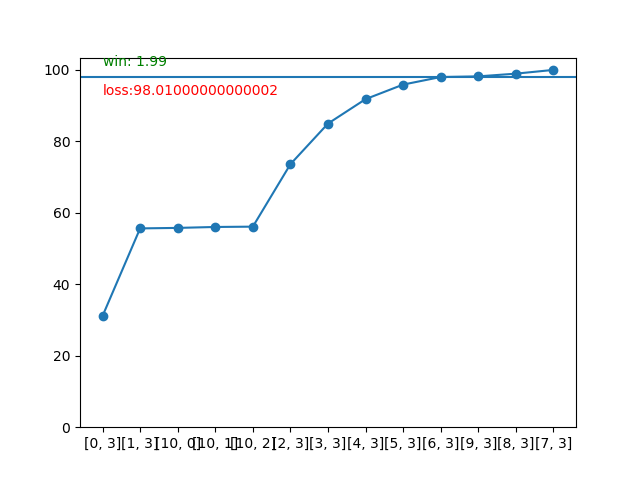

In [19]:
plot_cdf(labels, cdf, lvw)

In [20]:
# Giant hole above, shows a serious probelem in how we are representing data. Time for a major overhaul

rng = np.random.default_rng()

# this rolls one n_dice with n_sides once each. 
def roll_dice(n_sides, n_dice):
    return (rng.integers(low = 1, high = n_sides, size = n_dice, endpoint=True)).tolist()


# Let's reform the roll and attack functions so that they are markov chaning
def attack_m(n_a_troops, n_d_troops, n_a_dice=3, n_a_sides=6, n_d_sides=6, debug=False):
    # m stands for matrix output
    # n_a_troops is the number of troops on the board in attackers position
    # n_d_troops is the number of troops on the board in the defenders position
    # n_a_dice is the number of attack dice desired to be rolled each time
    # n_a_sides is number of sides on the attack dice (usually 6)
    # n_d_sides is numer of sides on the defend dice (usually 6)
    
    # number of defending dice. always assumed to be 2 unless less troops available
    ndd = 2
    
    score = np.zeros((n_a_troops, n_d_troops+1), dtype=int)
    
    # no troops left to attack or defend with
    # this while condition assumes we're fighting to the death
    while (n_a_troops > 1 and n_d_troops > 0):
        # attack!
        # n_a_sides is n_a_sides unless less troops available. fight to the death!
        nad = n_a_troops-1 if n_a_troops -1 < n_a_dice else n_a_dice
        ndd = n_d_troops if n_d_troops < ndd else ndd
        
        min_die = min([nad, ndd])
        
        a_rolls = roll_dice(n_a_sides, nad)
        d_rolls = roll_dice(n_d_sides, ndd)
        
        a_rolls.sort(reverse=True)
        d_rolls.sort(reverse=True)
        
        if debug:
            print("a rolls: ", a_rolls)
            print("d rolls: ", d_rolls)
        for i in range(min_die):
            if a_rolls[i] > d_rolls[i]:
                n_d_troops -=1
            else:
                n_a_troops -=1
        
        score[n_a_troops-1][n_d_troops] +=1
        if debug:
            print(score)
    
    return score
    


In [21]:
score = attack_m(5, 5, debug=True)

a rolls:  [5, 4, 2]
d rolls:  [4, 2]
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 1 0 0]]
a rolls:  [6, 3, 2]
d rolls:  [6, 2]
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 1 0 0]]
a rolls:  [6, 5, 5]
d rolls:  [6, 6]
[[0 0 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 1 0 0]]
a rolls:  [4]
d rolls:  [5, 4]
[[0 0 1 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 1 0 0]]


In [22]:
def attack_stats_m(n_a_troops, n_d_troops, n_a_dice=3, n_iter=10000, n_a_sides=6, n_d_sides=6):
    results = np.zeros((n_a_troops, n_d_troops+1), dtype=int)
    for i in range(n_iter):
        end_state = attack_m(n_a_troops, n_d_troops, n_a_dice, n_a_sides, n_d_sides)
        results += end_state
    
    return results

In [30]:
score = attack_stats_m(5, 5)
print(score)

[[   0  667 1306 1663 1460 1343]
 [ 428 1095 1702  473 1933    0]
 [ 948 1647    0 2827    0 2923]
 [1251  472 2491    0 3302    0]
 [ 934 1406    0 3775    0    0]]


In [31]:
print(score.ravel())

[   0  667 1306 1663 1460 1343  428 1095 1702  473 1933    0  948 1647
    0 2827    0 2923 1251  472 2491    0 3302    0  934 1406    0 3775
    0    0]


At this point we could just stop and collect the final results from top-most and left-most columns

In [37]:
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_bar(score_matrix):
    fig = plt.figure()
    ax1 = fig.add_subplot(111, projection='3d')
    # make our base grid
    # shamelessly stolen from a tutorial
    _x = np.arange(len(score_matrix))
    _y = np.arange(len(score_matrix[0]))
    _xx, _yy = np.meshgrid(_x, _y)
    x, y = _xx.ravel(), _yy.ravel()
    top = score_matrix.transpose().flatten()
    bottom = np.zeros_like(top)
    width = depth = .5
    
    ax1.bar3d(x, y, bottom, width, depth, top)

    plt.show()

[[   0 1051 2443 4463]
 [ 733 1784 3253    0]
 [1310 2284    0    0]]


<IPython.core.display.Javascript object>


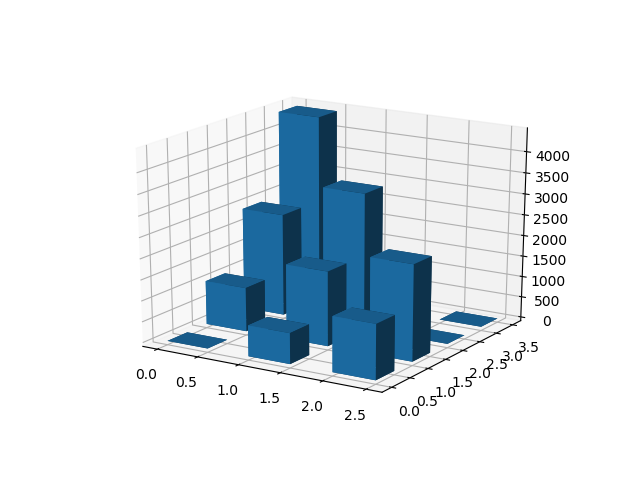

In [38]:
score = attack_stats_m(3,3)
print(score)
plot_3d_bar(score)

<IPython.core.display.Javascript object>


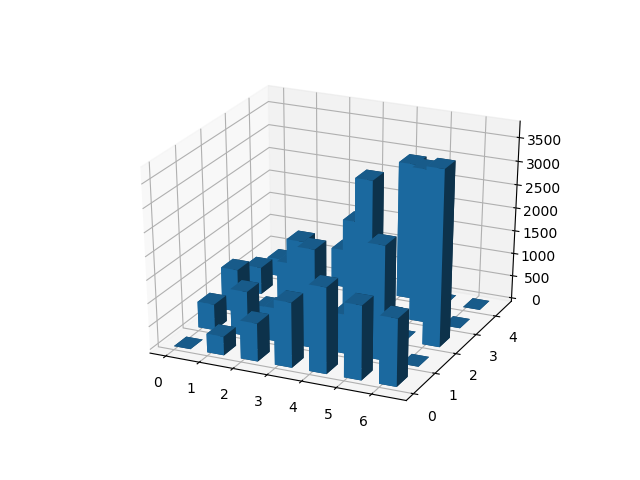

In [40]:
plot_3d_bar(attack_stats_m(7, 4))

Let's update to include colors

In [67]:

def plot_3d_bar_better(score_matrix):
    nat = len(score_matrix)
    ndt = len(score_matrix[0])
    fig = plt.figure()
    ax1 = fig.add_subplot(111, projection='3d')
    # make our base grid
    # shamelessly stolen from a tutorial
    _x = np.arange(len(score_matrix))
    _y = np.arange(len(score_matrix[0]))
    _xx, _yy = np.meshgrid(_x, _y)
    x, y = _xx.ravel(), _yy.ravel()
    top = score_matrix.transpose().flatten()
    
    bottom = np.zeros_like(top)
    width = depth = .5
    
    cm = plt.cm.get_cmap('cool')
    max_val = np.amax(top)
    C = [ cm(i/max_val) for i in top ]
    
    ax1.bar3d(x, y, bottom, width, depth, top, color = C)
    ax1.set_xlabel("Number of Attack Troops Left")
    ax1.set_xticklabels(range( nat+1))
    ax1.set_ylabel("Number of Defend Troops Left")
    ax1.set_title("Attacking "+ str(nat) + " vs " + str(ndt-1) + "\n Defender dice has 7 sides")

    plt.show()

<IPython.core.display.Javascript object>


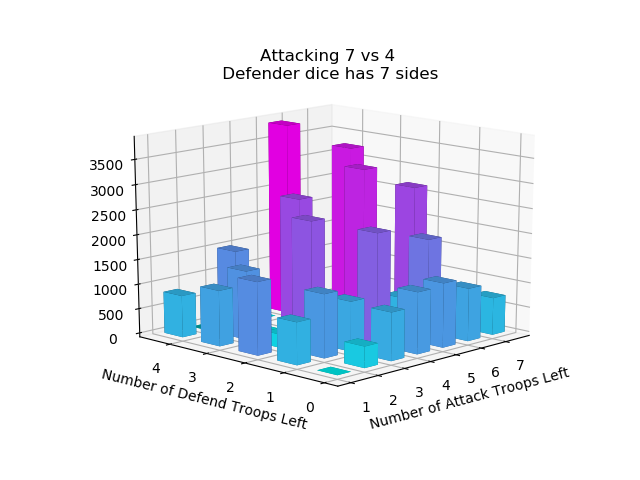

In [70]:
plot_3d_bar_better(attack_stats_m(7,4, n_d_sides=7))

In [ ]:
score = 

In [ ]:



def prep_for_graph(results):
    labels = []
    values = []
    for i in sorted(results.keys()):
        labels.append(i)
        values.append(results[i])
    
    return labels, values

def normalize_values(values):
    total = 0
    for i in values:
        total += i
    output = []
    for i in values:
        # only keep two digits
        output.append(int(10000 * i/total)/100)
    return output

# shamelessly copy-pasting code found on the internet
def autolabel(ax, rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}%'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
        
def fancy_plot(labels, values):
    fig, ax = plt.subplots()
    rects = ax.bar(labels, normalize_values(values))
    #ax.set_title("Attack Dice ="+str(n_attack)+", Defender Dice ="+str(n_deffend)+"\n"+str(n_rolls)+" rolls\n[Attacker wins, Deffender wins]")
    ax.yaxis.set_major_formatter(mticker.PercentFormatter(decimals=0))
    ax.set_ylim(ymax=max(normalize_values(values)) * 1.15)

    autolabel(ax, rects)
    plt.show()